In [89]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle


In [90]:
# df = pd.read_csv("familyxx.csv")

## Demographics

In [91]:
df_demog = pd.read_sas('DEMO_I.XPT')

In [92]:
df_demog.shape

(9971, 47)

In [93]:
df_demog_vars = df_demog[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'INDFMPIR']]

In [94]:
df_demog_vars.shape

(9971, 7)

In [95]:
df_demog_vars.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2    4252
DMDHHSIZ       0
DMDFMSIZ       0
INDFMPIR    1052
dtype: int64

In [96]:
df_demog_vars['DMDEDUC2'].fillna(round(df_demog_vars['DMDEDUC2'].mean()), inplace=True)

In [97]:
df_demog_vars.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2       0
DMDHHSIZ       0
DMDFMSIZ       0
INDFMPIR    1052
dtype: int64

In [98]:
df_demog_vars['INDFMPIR'].fillna(df_demog_vars['INDFMPIR'].mean(), inplace=True)

In [99]:
df_demog_vars.isnull().sum()

SEQN        0
RIAGENDR    0
RIDAGEYR    0
DMDEDUC2    0
DMDHHSIZ    0
DMDFMSIZ    0
INDFMPIR    0
dtype: int64

## Medical

In [100]:
df_med = pd.read_sas('MCQ_I.XPT')

In [101]:
df_med.shape

(9575, 90)

In [102]:
df_med_vars = df_med[['SEQN', 'MCQ010', 'MCQ025', 'MCQ035', 'MCQ080', 'MCQ300B']]

In [103]:
df_med_vars.shape

(9575, 6)

In [105]:
df_med_vars[(df_med_vars['MCQ025']>=1) & (df_med_vars['MCQ025']<=13) & (df_med_vars['MCQ035']==2)]
# df_med_vars['MCQ025'].between(1,10).count()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ080,MCQ300B
4,83736.0,1.0,10.0,2.0,2.0,2.0
15,83747.0,1.0,13.0,2.0,1.0,9.0
18,83750.0,1.0,1.0,2.0,2.0,2.0
20,83752.0,1.0,10.0,2.0,2.0,2.0
24,83756.0,1.0,2.0,2.0,2.0,1.0
33,83766.0,1.0,1.0,2.0,NaN,2.0
41,83774.0,1.0,4.0,2.0,NaN,2.0
50,83784.0,1.0,2.0,2.0,2.0,1.0
81,83816.0,1.0,3.0,2.0,2.0,2.0
86,83821.0,1.0,8.0,2.0,2.0,1.0


In [106]:
df_med_vars['MCQ025'].fillna(0, inplace=True)

In [107]:
df_med_vars['MCQ035'].fillna(2, inplace=True)

In [108]:
df_med_vars['MCQ080'].fillna(2, inplace=True)

In [109]:
df_med_vars['MCQ300B'].fillna(1, inplace=True)

In [110]:
df_med_vars.isnull().sum()

SEQN       0
MCQ010     0
MCQ025     0
MCQ035     0
MCQ080     0
MCQ300B    0
dtype: int64

In [111]:
df_med_vars = df_med_vars[df_med_vars['MCQ010'] !=7]

In [112]:
df_med_vars = df_med_vars[df_med_vars['MCQ010'] !=9]

In [113]:
df_med_vars = df_med_vars[df_med_vars['MCQ035'] !=7]

In [114]:
df_med_vars = df_med_vars[df_med_vars['MCQ035'] !=9]

In [115]:
df_med_vars = df_med_vars[df_med_vars['MCQ080'] !=7]

In [116]:
df_med_vars = df_med_vars[df_med_vars['MCQ080'] !=9]

In [117]:
df_med_vars = df_med_vars[df_med_vars['MCQ300B'] !=7]

In [118]:
df_med_vars = df_med_vars[df_med_vars['MCQ300B'] !=9]

In [119]:
df_med_vars = df_med_vars[df_med_vars['MCQ025'] !=99999]

In [120]:
df_med_vars[df_med_vars['MCQ025']==99999].count()

SEQN       0
MCQ010     0
MCQ025     0
MCQ035     0
MCQ080     0
MCQ300B    0
dtype: int64

## Dietary

In [121]:
df_diet = pd.read_sas('DR1TOT_I.XPT')

In [122]:
df_diet.shape

(9544, 168)

In [123]:
df_diet_vars = df_diet[['SEQN', 'DR1TTFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TVB1', 'DR1TVB2', 'DR1TVD', 'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO']]

In [124]:
# df_diet_vars.describe()

In [125]:
df_diet_vars['DR1TTFAT'].fillna(df_diet_vars['DR1TTFAT'].mean(), inplace=True)

In [126]:
df_diet_vars['DR1TCHOL'].fillna(df_diet_vars['DR1TCHOL'].mean(), inplace=True)

In [127]:
df_diet_vars['DR1TATOC'].fillna(df_diet_vars['DR1TATOC'].mean(), inplace=True)

In [128]:
df_diet_vars['DR1TVB1'].fillna(df_diet_vars['DR1TVB1'].mean(), inplace=True)

In [129]:
df_diet_vars['DR1TVB2'].fillna(df_diet_vars['DR1TVB2'].mean(), inplace=True)

In [130]:
df_diet_vars['DR1TVD'].fillna(df_diet_vars['DR1TVD'].mean(), inplace=True)

In [131]:
df_diet_vars['DR1TMAGN'].fillna(df_diet_vars['DR1TMAGN'].mean(), inplace=True)

In [132]:
df_diet_vars['DR1TCAFF'].fillna(df_diet_vars['DR1TCAFF'].mean(), inplace=True)

In [133]:
df_diet_vars['DR1TALCO'].fillna(df_diet_vars['DR1TALCO'].mean(), inplace=True)

In [134]:
df_diet_vars.isnull().sum()

SEQN        0
DR1TTFAT    0
DR1TCHOL    0
DR1TATOC    0
DR1TVB1     0
DR1TVB2     0
DR1TVD      0
DR1TMAGN    0
DR1TCAFF    0
DR1TALCO    0
dtype: int64

## Merge

In [165]:
df_demog_vars.shape

(9971, 7)

In [166]:
df_med_vars.shape

(9338, 6)

In [167]:
mrg1 = pd.merge(df_demog_vars, df_med_vars, how='inner', on='SEQN')

In [168]:
mrg1.shape

(9338, 12)

In [169]:
df_diet_vars.shape

(9544, 10)

In [170]:
df = pd.merge(mrg1, df_diet_vars, how='inner', on='SEQN')

In [171]:
df.shape

(8938, 21)

In [172]:
df.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ',
       'INDFMPIR', 'MCQ010', 'MCQ025', 'MCQ035', 'MCQ080', 'MCQ300B',
       'DR1TTFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TVB1', 'DR1TVB2', 'DR1TVD',
       'DR1TMAGN', 'DR1TCAFF', 'DR1TALCO'],
      dtype='object')

In [173]:
df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,DMDFMSIZ,INDFMPIR,MCQ010,MCQ025,MCQ035,...,MCQ300B,DR1TTFAT,DR1TCHOL,DR1TATOC,DR1TVB1,DR1TVB2,DR1TVD,DR1TMAGN,DR1TCAFF,DR1TALCO
0,83732.0,1.0,62.0,5.0,2.0,2.0,4.39,2.0,0.0,2.0,...,2.0,79.24,138.0,10.59,2.344,1.949,2.600000e+00,255.0,3.600000e+02,5.397605e-79
1,83733.0,1.0,53.0,3.0,1.0,1.0,1.32,2.0,0.0,2.0,...,2.0,77.91,407.0,4.19,1.859,2.478,4.600000e+00,262.0,1.920000e+02,8.930000e+01
2,83734.0,1.0,78.0,3.0,2.0,2.0,1.51,1.0,60.0,1.0,...,1.0,91.97,506.0,11.62,2.776,2.406,4.700000e+00,497.0,3.060000e+02,5.397605e-79
3,83736.0,2.0,42.0,4.0,5.0,5.0,1.23,1.0,10.0,2.0,...,2.0,19.63,96.0,1.76,0.168,0.219,5.397605e-79,42.0,5.397605e-79,5.397605e-79
4,83737.0,2.0,72.0,2.0,5.0,5.0,2.82,2.0,0.0,2.0,...,2.0,43.08,233.0,4.42,1.274,1.191,1.500000e+00,258.0,2.000000e+00,5.397605e-79


In [174]:
df.drop(columns='SEQN', inplace = True)
df.drop(columns='RIAGENDR', inplace = True)

In [175]:
df.columns

Index(['RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'INDFMPIR', 'MCQ010',
       'MCQ025', 'MCQ035', 'MCQ080', 'MCQ300B', 'DR1TTFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TVB1', 'DR1TVB2', 'DR1TVD', 'DR1TMAGN', 'DR1TCAFF',
       'DR1TALCO'],
      dtype='object')

## EDA

In [176]:
# just looking at the class distribution first
print(f'Still with asthma: {df.MCQ035.value_counts()[1]}')
print(f'Not with asthma: {df.MCQ035.value_counts()[2]}')

Still with asthma: 790
Not with asthma: 8148


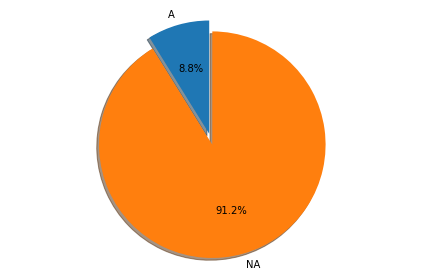

In [177]:
# Pie chart
labels = ['A', 'NA']
sizes = [df.MCQ035.value_counts()[1], df.MCQ035.value_counts()[2]]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('class_dist', dpi=200)
plt.show()

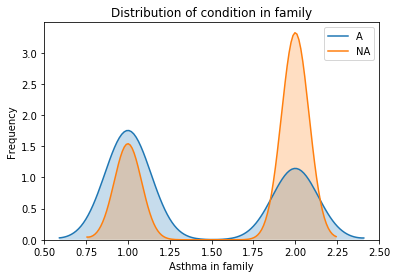

In [178]:
ax = sb.kdeplot(df[df['MCQ035'] == 1]['MCQ300B'], shade = True, label="A")
ax = sb.kdeplot(df[df['MCQ035'] == 2]['MCQ300B'], shade = True, label="NA")
ax.set_xlabel('Asthma in family')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of condition in family')

fig = ax.get_figure()

In [179]:
len(df.columns)

19

In [188]:
feats = list(df.columns)
feats[:19]

['RIDAGEYR',
 'DMDEDUC2',
 'DMDHHSIZ',
 'DMDFMSIZ',
 'INDFMPIR',
 'MCQ010',
 'MCQ025',
 'MCQ035',
 'MCQ080',
 'MCQ300B',
 'DR1TTFAT',
 'DR1TCHOL',
 'DR1TATOC',
 'DR1TVB1',
 'DR1TVB2',
 'DR1TVD',
 'DR1TMAGN',
 'DR1TCAFF',
 'DR1TALCO']

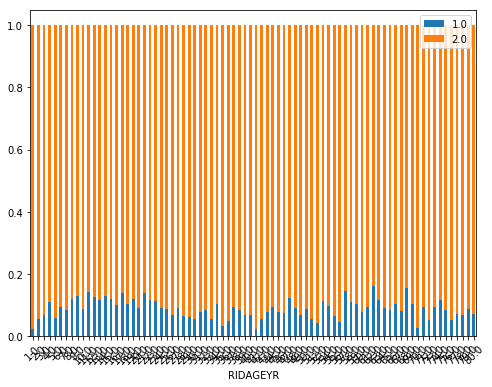

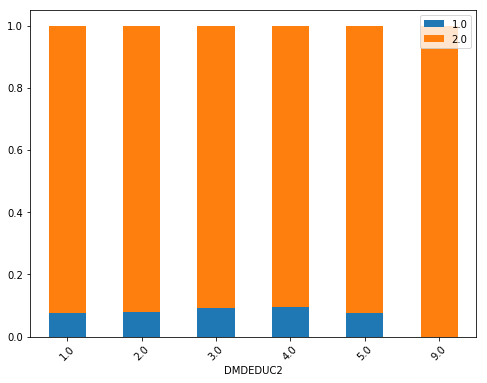

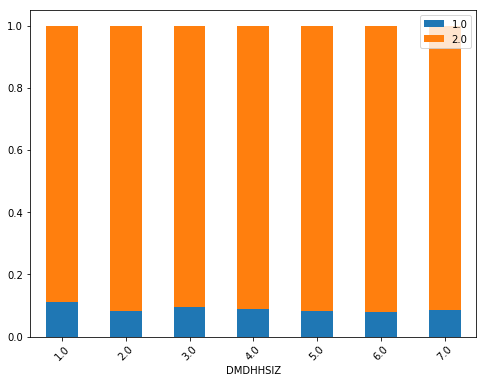

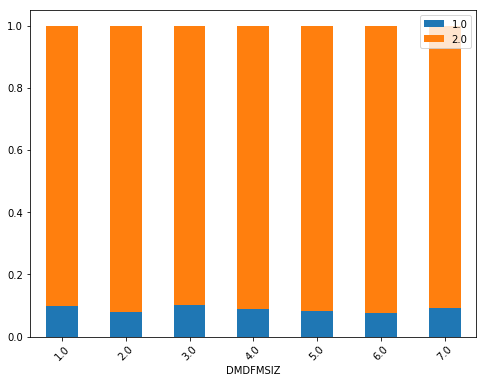

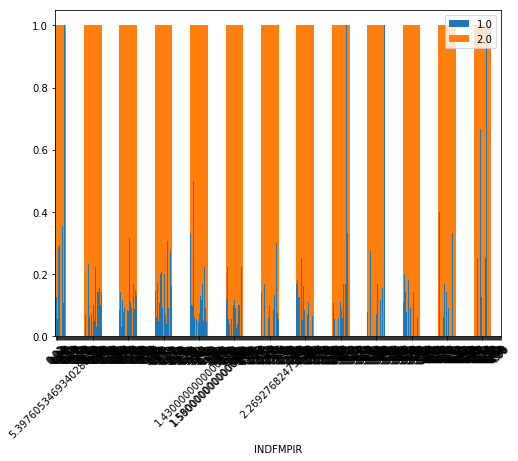

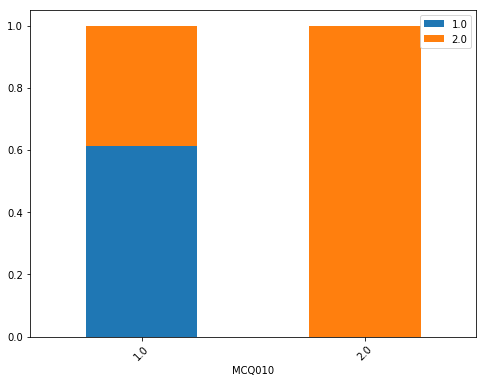

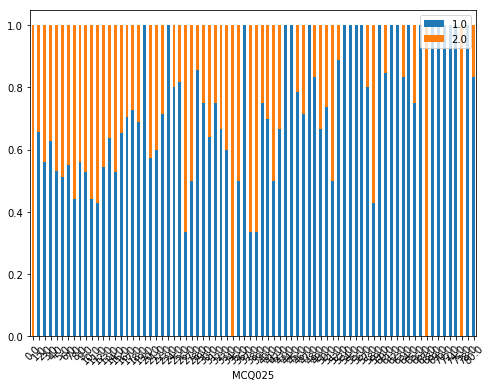

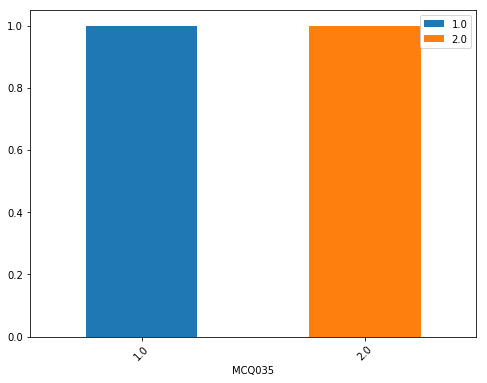

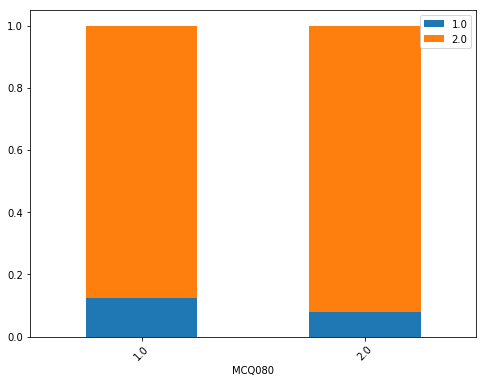

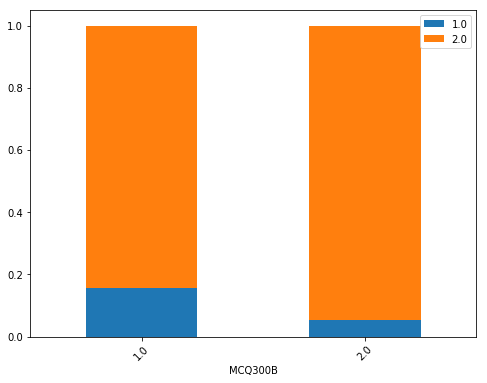

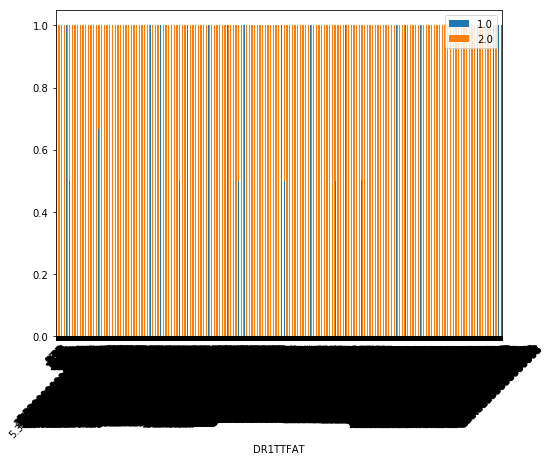

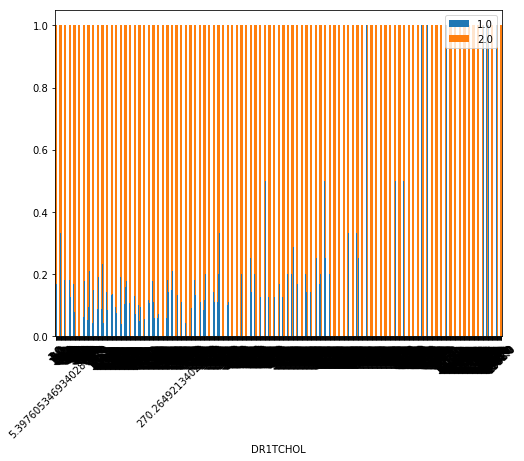

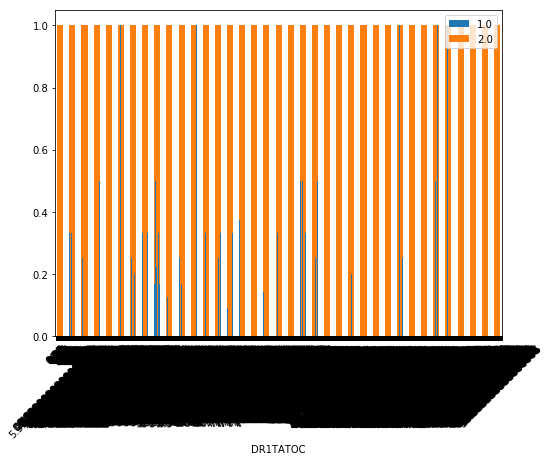

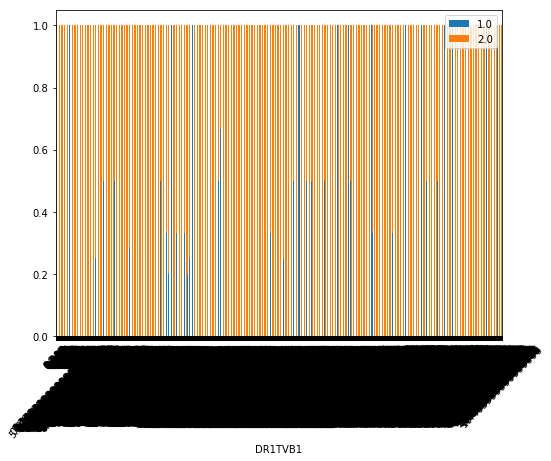

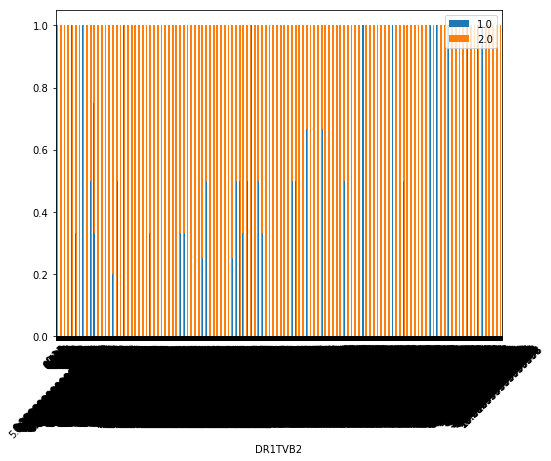

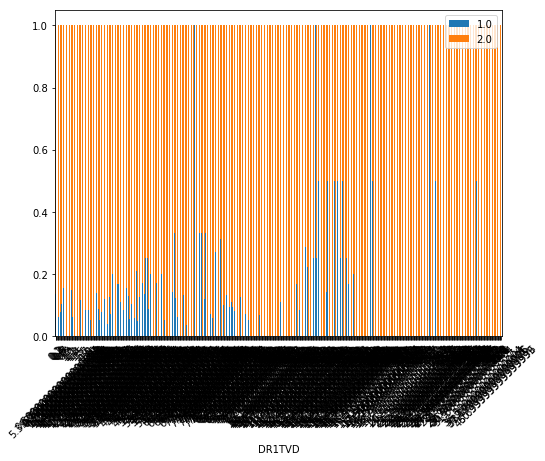

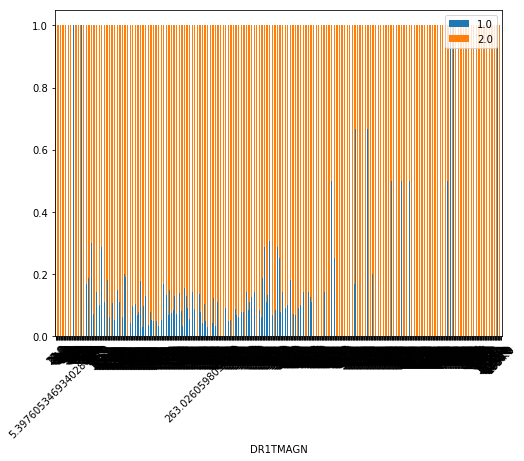

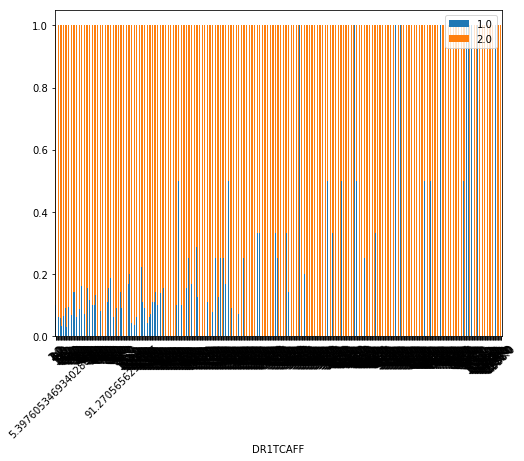

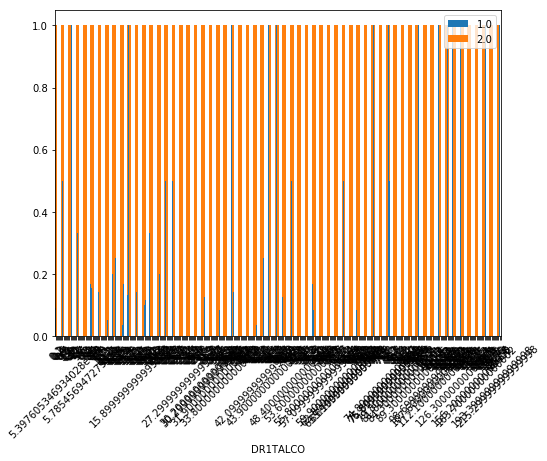

In [180]:
def stacked_bar_plot(col_1, col_2):
    
    x = df.groupby(col_1)[col_2].value_counts(normalize=True).unstack()
    x.plot(kind='bar', stacked='True', figsize=(8,6))
    plt.legend(loc=1)
    plt.xticks(rotation=45)
    plt.show();

feats = list(df.columns)
stack_list = feats[0:22]

for feature in stack_list:
    
    stacked_bar_plot(feature, 'MCQ035')

## Train-test-split

In [155]:
y = df.pop('MCQ035')

In [156]:
y.shape

(8938,)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .2, random_state=42)

In [158]:
print("Before OverSampling, counts of label A: {}".format(y_train.value_counts()[1]))
print("Before OverSampling, counts of label NA: {} \n".format(sum(y_train==2)))


Before OverSampling, counts of label A: 639
Before OverSampling, counts of label NA: 6511 



In [159]:
with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f)

with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## --------------

### Helper func / Misc.

In [ ]:
# df_diet_vars.dropna(inplace=True)

In [ ]:
# df_diet_vars.shape

In [ ]:
# df_diet_vars.isnull().sum().sum()

In [ ]:
# mrg1 = pd.merge(df_demog, df_diet_vars, how='inner', on='SEQN')